# 🧪 Hypothesis Testing: Proportions and Means

## 📌 Topic
This notebook explores hypothesis testing using both **Z-tests** and **T-tests**, focusing on **proportions** and **means**. We assess whether statistical evidence supports claims made in real-world contexts such as manufacturing, education, and customer service.

---

## 🎯 Objectives

- Understand how to set up **null (H₀)** and **alternative (H₁)** hypotheses
- Identify whether a hypothesis test is **left-tailed**, **right-tailed**, or **two-tailed**
- Visualize rejection regions and sampling distributions
- Apply **Z-tests** (for known population standard deviation) and **T-tests** (for unknown population standard deviation)
- Use **p-values** and **critical values** to make decisions about hypotheses
- Communicate results clearly with **graphs and test statistics**

---

## 🧾 Part 1: Visualization of Hypothesis Tests

- Derive hypotheses from real-world statements
- Identify the test type (left-tailed or right-tailed)
- Use `scipy.stats` and `matplotlib` to visualize sampling distributions and rejection regions

---


- Apply:
  - **Z-test** for IQ scores (known σ)
  - **T-test** for response times (unknown σ)

---

## 📈 Libraries Used

- `numpy`
- `matplotlib`
- `scipy.stats`



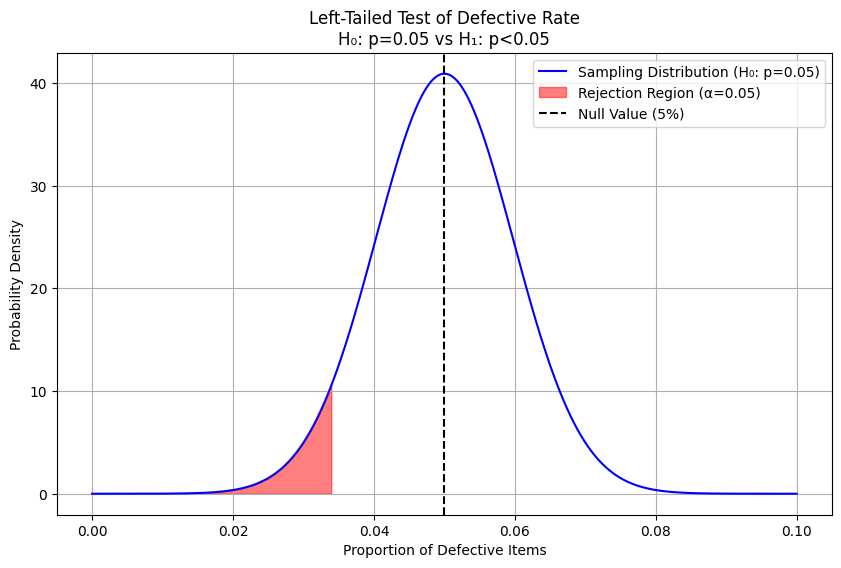

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


null_value = 0.05  # (H₀)
alpha = 0.05  # Significance level


x = np.linspace(0, 0.10, 1000)
y = norm.pdf(x, loc=null_value, scale=np.sqrt(null_value*(1-null_value)/500))


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Sampling Distribution (H₀: p=0.05)')


critical_value = null_value + norm.ppf(alpha) * np.sqrt(null_value*(1-null_value)/500)
plt.fill_between(x, y, where=(x <= critical_value), color='red', alpha=0.5,
                label=f'Rejection Region (α={alpha})')


plt.axvline(null_value, color='k', linestyle='--', label='Null Value (5%)')
plt.title('Left-Tailed Test of Defective Rate\nH₀: p=0.05 vs H₁: p<0.05')
plt.xlabel('Proportion of Defective Items')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.show()

2. Statement:
An educational consultant suggests that the average test scores of students who attend a test preparation course are greater than the national average.

Null: <ind> Students who attend a test preparation course are equal to the national average.
<br>
Alternative:<ind> Students who attend a test preparation course are greater than the national average.

Test: <ind> H₀: μ = μ₀ <br>
      <ind> <ind> H₁: μ > μ₀ <br> This is a right-tailed test because we're only interested in scores higher than the national average.


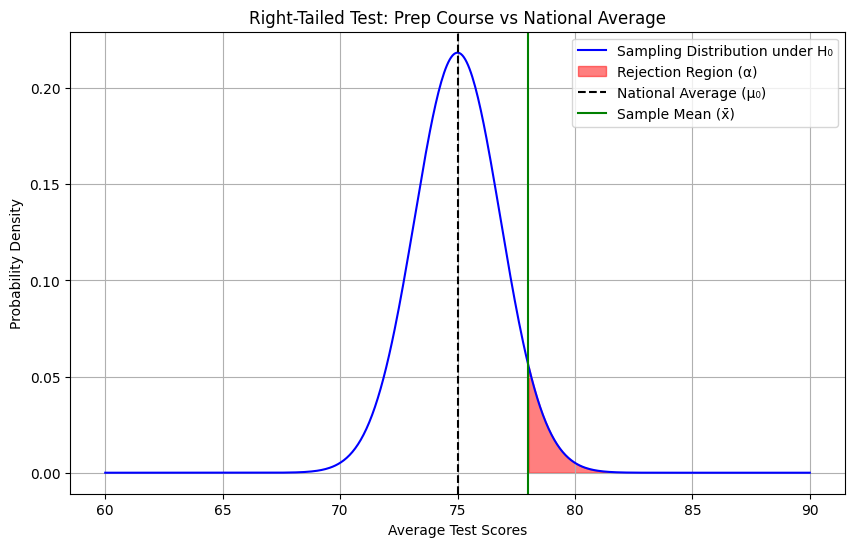

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

national_avg = 75
alpha = 0.05
sample_mean = 78
n = 30
sigma = 10


z_critical = norm.ppf(1 - alpha)
z_score = (sample_mean - national_avg) / (sigma/np.sqrt(n))


x = np.linspace(national_avg - 15, national_avg + 15, 500)
y = norm.pdf(x, loc=national_avg, scale=sigma/np.sqrt(n))


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Sampling Distribution under H₀')


plt.fill_between(x, y, where=(x >= national_avg + z_critical*sigma/np.sqrt(n)),
                color='red', alpha=0.5, label=f'Rejection Region (α)')


plt.axvline(national_avg, color='k', linestyle='--', label=f'National Average (μ₀)')
plt.axvline(sample_mean, color='g', linestyle='-', label=f'Sample Mean (x̄)')


plt.title('Right-Tailed Test: Prep Course vs National Average')
plt.xlabel('Average Test Scores')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()